In [29]:
include("../taxi_model.jl")

train_reconstruction (generic function with 1 method)

# Helper Functions

In [2]:
using PGFPlots

In [3]:
using Distributions

In [4]:
function plot_results(npn, im; χ_prior = 0.0, n_prior = 1.0, simple = false,
    ymin = -1.1, ymax = 1.1)
    # Prior
    μ₀_prior, σ₀²_prior = to_normal(χ_prior, n_prior, npn.σ²)
    println(σ₀²_prior)
    f_prior(x) = pdf(Normal(μ₀_prior, √(σ₀²_prior)), x)

    # Posterior
    if simple
        χ_post, n_post = get_posterior_simple(npn, im, χ_prior = χ_prior, n_prior = n_prior)
    else
        χ_post, n_post = get_posterior(npn, im, χ_prior = χ_prior, n_prior = n_prior)
    end
    μ₀, σ₀² = to_normal(χ_post, n_post, npn.σ²)
    println(σ₀²)
    f(x) = pdf(Normal(μ₀, √(σ₀²)), x)

    if simple
        χ_post_rand, n_post_rand = get_posterior_simple(npn, rand(128), χ_prior = χ_prior, n_prior = n_prior)
    else
        χ_post_rand, n_post_rand = get_posterior(npn, rand(128), χ_prior = χ_prior, n_prior = n_prior)
    end
    μ₀_rand, σ₀²_rand = to_normal(χ_post_rand, n_post_rand, npn.σ²)
    println(σ₀²_rand)
    f_rand(x) = pdf(Normal(μ₀_rand, √(σ₀²_rand)), x)

    ax1 = Axis(Plots.Linear(f_prior, (ymin, ymax)))
    ax1.xlabel = L"$\mu$"
    ax1.ylabel = L"$f(\mu)$"
    ax1.title = "Prior"
    ax1.height = "5.5cm"
    ax1.width = "5.5cm"
    ax1.ymin = 0.0

    ax2 = Axis(Plots.Linear(f, (ymin, ymax)))
    ax2.xlabel = L"$\mu$"
    ax2.ylabel = L"$f(\mu)$"
    ax2.title = "Posterior Training Image"
    ax2.height = "5.5cm"
    ax2.width = "5.5cm"
    ax2.ymin = 0.0

    ax3 = Axis(Plots.Linear(f_rand, (ymin, ymax)))
    ax3.xlabel = L"$\mu$"
    ax3.ylabel = L"$f(\mu)$"
    ax3.title = "Posterior Random"
    ax3.height = "5.5cm"
    ax3.width = "5.5cm"
    ax3.ymin = 0.0

    g = GroupPlot(3, 1, groupStyle = "horizontal sep = 1.75cm, vertical sep = 1.5cm")
    push!(g, ax1)
    push!(g, ax2)
    push!(g, ax3)

    return g
end

plot_results (generic function with 1 method)

In [5]:
using NearestNeighbors

In [6]:
function get_latent_distances(enc, Xin, Xout)
    # Compute latent representations
    Zin = enc(Xin)
    Zout = enc(Xout)

    # Create tree for nearest neighbors
    kdtree = KDTree(Zin)

    _, dists_in = knn(kdtree, Zin, 2)
    dists_in = [dists_in[i][1] for i in 1:length(dists_in)]
    _, dists_out = knn(kdtree, Zout, 1)
    dists_out = [dists_out[i][1] for i in 1:length(dists_out)]

    return dists_in, dists_out
end

get_latent_distances (generic function with 1 method)

# Training as autoencoder

In [30]:
X, y = get_taxi_data(1);

In [31]:
npn = natPN_nonlinear(h = 16, σ² = 0.01);

In [32]:
nepoch = 250
lr = 1e-3
batchsize = 128

train_reconstruction(npn.encoder |> gpu, X |> gpu; device = gpu, nepoch = nepoch, lr = lr, batchsize = batchsize)

┌ Info: Epoch 1
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.25408277f0
l = 0.005231956f0


┌ Info: Epoch 2
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.005133069f0


┌ Info: Epoch 3
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.005099278f0


┌ Info: Epoch 4
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0050291694f0


┌ Info: Epoch 5
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 6
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.004762271f0
l = 0.004391221f0


┌ Info: Epoch 7
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0041162716f0


┌ Info: Epoch 8
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.00396254f0


┌ Info: Epoch 9
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0038883057f0


┌ Info: Epoch 10
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0038236591f0


┌ Info: Epoch 11
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0037969172f0


┌ Info: Epoch 12
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0037391756f0


┌ Info: Epoch 13
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0036706114f0


┌ Info: Epoch 14
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.003621807f0


┌ Info: Epoch 15
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0034999736f0


┌ Info: Epoch 16
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.003408594f0


┌ Info: Epoch 17
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0032951587f0


┌ Info: Epoch 18
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0032434424f0


┌ Info: Epoch 19
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 20
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0031489148f0
l = 0.003108148f0


┌ Info: Epoch 21
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0030655048f0


┌ Info: Epoch 22
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0030050743f0


┌ Info: Epoch 23
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.00296121f0


┌ Info: Epoch 24
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0029263818f0


┌ Info: Epoch 25
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0028984998f0


┌ Info: Epoch 26
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.002874253f0


┌ Info: Epoch 27
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0028443318f0


┌ Info: Epoch 28
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0028112072f0


┌ Info: Epoch 29
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.002768069f0


┌ Info: Epoch 30
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0027570818f0


┌ Info: Epoch 31
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0027092826f0


┌ Info: Epoch 32
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.002680446f0


┌ Info: Epoch 33
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0026497298f0


┌ Info: Epoch 34
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0026573734f0


┌ Info: Epoch 35
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.002609175f0


┌ Info: Epoch 36
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0025980226f0


┌ Info: Epoch 37
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 38
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0026075738f0
l = 0.002570572f0


┌ Info: Epoch 39
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.002571196f0


┌ Info: Epoch 40
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0025557484f0


┌ Info: Epoch 41
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0025236262f0


┌ Info: Epoch 42
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0025242795f0


┌ Info: Epoch 43
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.002522347f0


┌ Info: Epoch 44
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0025109688f0


┌ Info: Epoch 45
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0025130485f0


┌ Info: Epoch 46
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0024808813f0


┌ Info: Epoch 47
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.002485762f0


┌ Info: Epoch 48
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0024975894f0


┌ Info: Epoch 49
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0024452505f0


┌ Info: Epoch 50
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0024475297f0


┌ Info: Epoch 51
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0024520517f0


┌ Info: Epoch 52
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.002411121f0


┌ Info: Epoch 53
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0023942036f0


┌ Info: Epoch 54
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0023654373f0


┌ Info: Epoch 55
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.002360261f0


┌ Info: Epoch 56
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0023220256f0


┌ Info: Epoch 57
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0023113256f0


┌ Info: Epoch 58
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0022874558f0


┌ Info: Epoch 59
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0022877895f0


┌ Info: Epoch 60
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0022489682f0


┌ Info: Epoch 61
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0022231913f0


┌ Info: Epoch 62
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.002219414f0


┌ Info: Epoch 63
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0021899475f0


┌ Info: Epoch 64
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0022100476f0


┌ Info: Epoch 65
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0021673315f0


┌ Info: Epoch 66
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0021859768f0


┌ Info: Epoch 67
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0021343934f0


┌ Info: Epoch 68
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0021209759f0


┌ Info: Epoch 69
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0021270271f0


┌ Info: Epoch 70
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0021149542f0


┌ Info: Epoch 71
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0020932283f0


┌ Info: Epoch 72
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0020821972f0


┌ Info: Epoch 73
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0020786664f0


┌ Info: Epoch 74
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0020558343f0


┌ Info: Epoch 75
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0020640283f0


┌ Info: Epoch 76
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0020589302f0


┌ Info: Epoch 77
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.002046972f0


┌ Info: Epoch 78
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0020716616f0


┌ Info: Epoch 79
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0020257486f0


┌ Info: Epoch 80
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0020168612f0


┌ Info: Epoch 81
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0020097848f0


┌ Info: Epoch 82
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.002012142f0


┌ Info: Epoch 83
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0019967123f0


┌ Info: Epoch 84
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0019822628f0


┌ Info: Epoch 85
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0019729417f0


┌ Info: Epoch 86
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0019698776f0


┌ Info: Epoch 87
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0019894317f0


┌ Info: Epoch 88
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.001962036f0


┌ Info: Epoch 89
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0019625127f0


┌ Info: Epoch 90
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0019326494f0


┌ Info: Epoch 91
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0019305744f0


┌ Info: Epoch 92
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0019298508f0


┌ Info: Epoch 93
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0019197044f0


┌ Info: Epoch 94
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0019124916f0


┌ Info: Epoch 95
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0018985646f0


┌ Info: Epoch 96
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0018895144f0


┌ Info: Epoch 97
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0018898171f0


┌ Info: Epoch 98
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0018982266f0


┌ Info: Epoch 99
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0018784519f0


┌ Info: Epoch 100
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0018598811f0


┌ Info: Epoch 101
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0018595371f0


┌ Info: Epoch 102
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0018449926f0


┌ Info: Epoch 103
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0018583558f0


┌ Info: Epoch 104
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0018682051f0


┌ Info: Epoch 105
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0018428902f0


┌ Info: Epoch 106
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0018224808f0


┌ Info: Epoch 107
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0018125973f0


┌ Info: Epoch 108
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0018172438f0


┌ Info: Epoch 109
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0018043737f0


┌ Info: Epoch 110
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0018116974f0


┌ Info: Epoch 111
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0017932875f0


┌ Info: Epoch 112
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0018034719f0


┌ Info: Epoch 113
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0017951048f0


┌ Info: Epoch 114
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0017813892f0


┌ Info: Epoch 115
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0017767193f0


┌ Info: Epoch 116
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0017680215f0


┌ Info: Epoch 117
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0017455547f0


┌ Info: Epoch 118
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0017634258f0


┌ Info: Epoch 119
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0017577821f0


┌ Info: Epoch 120
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0017459497f0


┌ Info: Epoch 121
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 122
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0017515209f0
l = 0.0017218263f0


┌ Info: Epoch 123
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.00174298f0


┌ Info: Epoch 124
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0017462124f0


┌ Info: Epoch 125
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0017199105f0


┌ Info: Epoch 126
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0017228841f0


┌ Info: Epoch 127
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0017229032f0


┌ Info: Epoch 128
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0017076898f0


┌ Info: Epoch 129
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0017113062f0


┌ Info: Epoch 130
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0017311425f0


┌ Info: Epoch 131
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0017252282f0


┌ Info: Epoch 132
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.001713498f0


┌ Info: Epoch 133
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0017111357f0


┌ Info: Epoch 134
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0016970481f0


┌ Info: Epoch 135
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0016980292f0


┌ Info: Epoch 136
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0017129802f0


┌ Info: Epoch 137
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0016907996f0


┌ Info: Epoch 138
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0017078524f0


┌ Info: Epoch 139
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0017014297f0


┌ Info: Epoch 140
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0017017751f0


┌ Info: Epoch 141
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0016907309f0


┌ Info: Epoch 142
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0016744304f0


┌ Info: Epoch 143
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0016854127f0


┌ Info: Epoch 144
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0016696651f0


┌ Info: Epoch 145
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0016727571f0


┌ Info: Epoch 146
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0016585067f0


┌ Info: Epoch 147
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0017215236f0


┌ Info: Epoch 148
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0016878275f0


┌ Info: Epoch 149
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0016587337f0


┌ Info: Epoch 150
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0016512683f0


┌ Info: Epoch 151
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0016630501f0


┌ Info: Epoch 152
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0016385305f0


┌ Info: Epoch 153
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0016778777f0


┌ Info: Epoch 154
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0016466812f0


┌ Info: Epoch 155
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0016608275f0


┌ Info: Epoch 156
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0016352399f0


┌ Info: Epoch 157
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0016307728f0


┌ Info: Epoch 158
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0016380799f0


┌ Info: Epoch 159
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 160
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0016389575f0
l = 0.0016315317f0


┌ Info: Epoch 161
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0016199534f0


┌ Info: Epoch 162
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0016362492f0


┌ Info: Epoch 163
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0016048361f0


┌ Info: Epoch 164
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0016186575f0


┌ Info: Epoch 165
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0016082984f0


┌ Info: Epoch 166
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0016355724f0


┌ Info: Epoch 167
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0016182666f0


┌ Info: Epoch 168
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0015993973f0


┌ Info: Epoch 169
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0015918921f0


┌ Info: Epoch 170
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0015789235f0


┌ Info: Epoch 171
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0015824584f0


┌ Info: Epoch 172
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0015834902f0


┌ Info: Epoch 173
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0015902083f0


┌ Info: Epoch 174
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.001585711f0
l = 0.0015753541f0

┌ Info: Epoch 175
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 176
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136



l = 0.0016141703f0


┌ Info: Epoch 177
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0015559985f0


┌ Info: Epoch 178
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0015712539f0


┌ Info: Epoch 179
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0015637062f0


┌ Info: Epoch 180
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0015526874f0


┌ Info: Epoch 181
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0015564244f0


┌ Info: Epoch 182
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0015410745f0


┌ Info: Epoch 183
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0015416408f0


┌ Info: Epoch 184
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.001542377f0


┌ Info: Epoch 185
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0015287593f0


┌ Info: Epoch 186
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0015403167f0


┌ Info: Epoch 187
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0015350606f0


┌ Info: Epoch 188
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0015277424f0


┌ Info: Epoch 189
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0015352924f0


┌ Info: Epoch 190
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0015320623f0


┌ Info: Epoch 191
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.001536879f0


┌ Info: Epoch 192
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0015274424f0


┌ Info: Epoch 193
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0015302672f0


┌ Info: Epoch 194
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0015378156f0


┌ Info: Epoch 195
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0015245669f0


┌ Info: Epoch 196
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0015098372f0


┌ Info: Epoch 197
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.001526065f0


┌ Info: Epoch 198
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.001527895f0


┌ Info: Epoch 199
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0015109687f0


┌ Info: Epoch 200
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0014946674f0


┌ Info: Epoch 201
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0014910283f0


┌ Info: Epoch 202
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0015138865f0


┌ Info: Epoch 203
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0014775605f0


┌ Info: Epoch 204
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0015007443f0


┌ Info: Epoch 205
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0014968894f0


┌ Info: Epoch 206
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.00146893f0


┌ Info: Epoch 207
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0014761109f0


┌ Info: Epoch 208
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0014700016f0


┌ Info: Epoch 209
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0014955777f0


┌ Info: Epoch 210
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.001484122f0


┌ Info: Epoch 211
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0014812315f0


┌ Info: Epoch 212
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0014775699f0


┌ Info: Epoch 213
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0014591827f0


┌ Info: Epoch 214
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0014437262f0


┌ Info: Epoch 215
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.001455059f0


┌ Info: Epoch 216
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0014682242f0


┌ Info: Epoch 217
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0014359255f0


┌ Info: Epoch 218
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0014245958f0


┌ Info: Epoch 219
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0014341299f0


┌ Info: Epoch 220
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0014276216f0


┌ Info: Epoch 221
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0014208892f0
l = 0.0014225768f0

┌ Info: Epoch 222
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 223
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136



l = 0.0014303108f0


┌ Info: Epoch 224
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0014193864f0


┌ Info: Epoch 225
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0014399688f0


┌ Info: Epoch 226
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0014251805f0


┌ Info: Epoch 227
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0014174341f0


┌ Info: Epoch 228
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.001421695f0


┌ Info: Epoch 229
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.001415387f0


┌ Info: Epoch 230
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0014109542f0


┌ Info: Epoch 231
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0013988947f0


┌ Info: Epoch 232
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.001413944f0


┌ Info: Epoch 233
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.001389133f0


┌ Info: Epoch 234
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0014124415f0


┌ Info: Epoch 235
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 236
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0014033597f0
l = 0.0013991841f0


┌ Info: Epoch 237
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0013982974f0


┌ Info: Epoch 238
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0013808424f0


┌ Info: Epoch 239
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0013871422f0


┌ Info: Epoch 240
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0013844436f0


┌ Info: Epoch 241
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0013716851f0


┌ Info: Epoch 242
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0013877744f0


┌ Info: Epoch 243
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0013990108f0


┌ Info: Epoch 244
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.00138429f0


┌ Info: Epoch 245
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0013922419f0


┌ Info: Epoch 246
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.001388455f0


┌ Info: Epoch 247
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0013857677f0


┌ Info: Epoch 248
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0013671101f0


┌ Info: Epoch 249
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 0.0013765255f0


┌ Info: Epoch 250
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


Chain(Dense(128, 64, relu), Dense(64, 32, relu), Dense(32, 16, relu), Dense(16, 16))

### Check distances

In [33]:
Xrand = rand(128, 10000)
Xc, yc = get_taxi_data(1, fn = "/scratch/smkatz/NeuralFilter/downsampled_crossing_data.h5", flipped = false);

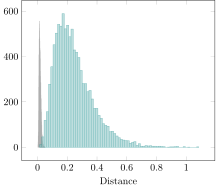

In [34]:
dists_in, dists_out = get_latent_distances(npn.encoder, X, Xrand)
ax = Axis()
push!(ax, Plots.Histogram(dists_in, style="gray, fill=gray!50, opacity = 0.5"))
push!(ax, Plots.Histogram(dists_out, style="teal, fill=teal!50, opacity = 0.5"))
ax.xlabel = "Distance"
ax

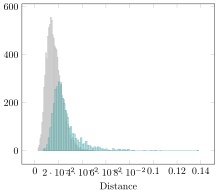

In [35]:
dists_in, dists_out = get_latent_distances(npn.encoder, X, Xc[:, 1801:end])
ax = Axis()
push!(ax, Plots.Histogram(dists_in, style="gray, fill=gray!50, opacity = 0.5"))
push!(ax, Plots.Histogram(dists_out, style="teal, fill=teal!50, opacity = 0.5"))
ax.xlabel = "Distance"
ax

# Train flow

In [36]:
npn.encoder |> cpu
z_in = npn.encoder(X);

In [37]:
nepoch = 50
lr = 1e-3
batchsize = 128

train_flow(npn.flow, z_in, y, nepoch, lr, batchsize);

┌ Info: Epoch 1
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 18.445912410690532
l = 15.983850736743491


┌ Info: Epoch 2
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 13.671481157708747


┌ Info: Epoch 3
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 11.404955814913027


┌ Info: Epoch 4
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 9.063355942970984


┌ Info: Epoch 5
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 6.4751573467361565


┌ Info: Epoch 6
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = 3.3647447227282896


┌ Info: Epoch 7
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -0.7203431837977743


┌ Info: Epoch 8
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -7.375471025842913


┌ Info: Epoch 9
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -13.51490464599077


┌ Info: Epoch 10
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -17.05642813458113


┌ Info: Epoch 11
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -21.602277957775797


┌ Info: Epoch 12
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -26.64808657262262


┌ Info: Epoch 13
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -29.5337542373689


┌ Info: Epoch 14
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -30.63797473302249


┌ Info: Epoch 15
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -31.373106131316042


┌ Info: Epoch 16
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -31.986041510038564


┌ Info: Epoch 17
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -32.562744769502935


┌ Info: Epoch 18
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -33.18244454449666


┌ Info: Epoch 19
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 20
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -33.7775252801331
l = -34.40388154746389


┌ Info: Epoch 21
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -35.02593467742291


┌ Info: Epoch 22
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -35.66629372421859


┌ Info: Epoch 23
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -36.22106761364715


┌ Info: Epoch 24
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -36.65723027149964


┌ Info: Epoch 25
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -36.97798490062752


┌ Info: Epoch 26
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -37.22855917706189


┌ Info: Epoch 27
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 28
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -37.506413648055435
l = -37.723472190064506


┌ Info: Epoch 29
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -37.91839475007655


┌ Info: Epoch 30
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -38.09084831644739


┌ Info: Epoch 31
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 32
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -38.25307490396683
l = -38.432945343539885


┌ Info: Epoch 33
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -38.546959764002345


┌ Info: Epoch 34
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -38.6844960868242


┌ Info: Epoch 35
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -38.82237201647531


┌ Info: Epoch 36
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -38.9213904417108


┌ Info: Epoch 37
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -39.06098729771258


┌ Info: Epoch 38
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 39
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -39.1445849169765
l = -39.278713267847856


┌ Info: Epoch 40
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -39.367059953857805


┌ Info: Epoch 41
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -39.48972349502003


┌ Info: Epoch 42
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -39.608729921244844


┌ Info: Epoch 43
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -39.7438008326936


┌ Info: Epoch 44
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -39.835459936320376


┌ Info: Epoch 45
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -39.92151513603649


┌ Info: Epoch 46
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -40.06107919525961


┌ Info: Epoch 47
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -40.17044115045656


┌ Info: Epoch 48
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -40.267708007123275


┌ Info: Epoch 49
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 50
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -40.36933945470922


### Check Likelihoods

In [38]:
z_out = npn.encoder(Xrand)
z_c = npn.encoder(Xc)

ll_in = logpdf(npn.flow, z_in)
ll_out = logpdf(npn.flow, z_out)
ll_c = logpdf(npn.flow, z_c);

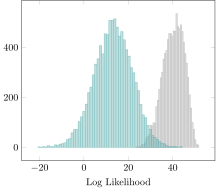

In [39]:
ax = Axis()
push!(ax, Plots.Histogram(ll_in, style="gray, fill=gray!50, opacity = 0.5"))
push!(ax, Plots.Histogram(ll_out, style="teal, fill=teal!50, opacity = 0.5"))
ax.xlabel = "Log Likelihood"
ax

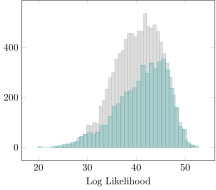

In [40]:
ax = Axis()
push!(ax, Plots.Histogram(ll_in, style="gray, fill=gray!50, opacity = 0.5"))
push!(ax, Plots.Histogram(ll_c, style="teal, fill=teal!50, opacity = 0.5"))
ax.xlabel = "Log Likelihood"
ax

# Fine tune with bayesian loss

In [41]:
nepoch = 50
lr = 1e-3
batchsize = 128

npn = train_npn(npn, X, y, nepoch, lr, batchsize, simple = true);

┌ Info: Epoch 1
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.3992370303319551
1 / n: 6.422941311038442e-12
entropy reg term: 0.00032472077772993223
l = 20441.10221003759
mse: 0.12014022696966768
1 / n: 0.09502641875664135
entropy reg term: 4.612522444953198e-5
l = 6199.856763365303


┌ Info: Epoch 2
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 3
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.053432089792658066
1 / n: 0.010722623147550589
entropy reg term: 6.623769751957343e-5
l = 2741.246894136769


┌ Info: Epoch 4
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.0367339105409395
1 / n: 0.002297081036417024
entropy reg term: 9.444755739339468e-5
l = 1882.0006823361337
mse: 0.025981579929522547
1 / n: 0.0028681195445083244
entropy reg term: 9.462979682978894e-5
l = 1331.7738200543195


┌ Info: Epoch 5
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 6
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.021852733246844062
1 / n: 0.008217807369515762
entropy reg term: 9.455707789042083e-5
l = 1123.1158728354876
mse: 0.019321655814954816
1 / n: 0.004856122826689023
entropy reg term: 0.00010914176792794483
l = 991.8109931981305


┌ Info: Epoch 7
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 8
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.01826304535698231
1 / n: 0.006102142033208656
entropy reg term: 0.00010241687711548294
l = 938.2446564395804


┌ Info: Epoch 9
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.012036034028348765
1 / n: 0.0010489998721131609
entropy reg term: 0.0001243520446164669
l = 616.8456984328222


┌ Info: Epoch 10
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.014184636960434554
1 / n: 0.0010857106135690473
entropy reg term: 0.00012199748824319169
l = 726.871758922377
mse: 0.010471178303572536
1 / n: 0.0007508933142428672
entropy reg term: 0.00013831531670130835
l = 536.5796039619572


┌ Info: Epoch 11
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.013654694372980274
1 / n: 0.002663734320134636
entropy reg term: 0.00012310132501180713
l = 700.547211746905


┌ Info: Epoch 12
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 13
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.007788152593342727
1 / n: 0.0011453087569723392
entropy reg term: 0.00012883406238475823
l = 399.40577390265844
mse: 0.008272509538075741
1 / n: 0.0018463095840615359
entropy reg term: 0.0001274588835481
l = 424.56305780489396


┌ Info: Epoch 14
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 15
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.00904531896462323
1 / n: 0.0017080050281667594
entropy reg term: 0.00012536420856932467
l = 464.0590160379181
mse: 0.011275166010958636
1 / n: 0.002359314943823608
entropy reg term: 0.00013037758975949367
l = 578.5632223382769


┌ Info: Epoch 16
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.006025835215753414
1 / n: 0.0004347841854281966
entropy reg term: 0.00014695515211613386
l = 308.8206135873975


┌ Info: Epoch 17
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.008494730198258435
1 / n: 0.0009258921364831222
entropy reg term: 0.00013762266097138554
l = 435.4747057271286


┌ Info: Epoch 18
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.007967631038698002
1 / n: 0.0010752907452185893
entropy reg term: 0.00013312895986903472
l = 408.5614200703426


┌ Info: Epoch 19
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.007256389458110156
1 / n: 0.0008248706226867917
entropy reg term: 0.00014487809113293408
l = 372.0236515967157


┌ Info: Epoch 20
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.006811549930417732
1 / n: 0.0014048163738200053
entropy reg term: 0.00013427066287122343
l = 349.53936900017385


┌ Info: Epoch 21
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.006690885167743895
1 / n: 0.0013180536118345054
entropy reg term: 0.00013466862097109242
l = 343.31711437168383


┌ Info: Epoch 22
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 23
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.008849109962955447
1 / n: 0.0012006785495397784
entropy reg term: 0.00014322766293970433
l = 453.7625100841085
mse: 0.005316426974207858
1 / n: 0.0006181282965432622
entropy reg term: 0.0001498242485847643
l = 272.594252782548


┌ Info: Epoch 24
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 25
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.00537087636515263
1 / n: 0.00033559669034890545
entropy reg term: 0.00015198486013007944
l = 275.2385116496598


┌ Info: Epoch 26
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.006881775415494522
1 / n: 0.0008992739849461633
entropy reg term: 0.000141576990066566
l = 352.87981697252593
mse: 0.005619677968868167
1 / n: 0.0007294275121032045
entropy reg term: 0.000138845736903849
l = 288.17206790954185


┌ Info: Epoch 27
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 28
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.006264239832813555
1 / n: 0.0007935494821332114
entropy reg term: 0.00014039152198820672
l = 321.20725723416416
mse: 0.004492821758970985
1 / n: 0.00071070908136382
entropy reg term: 0.00014746145549592428
l = 230.47185737418664


┌ Info: Epoch 29
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 30
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.006636282554081978
1 / n: 0.000807739381748721
entropy reg term: 0.00014287249416187667
l = 340.2643800494635
mse: 0.005427122407336484
1 / n: 0.0004950083400238567
entropy reg term: 0.00015437319443129227
l = 278.20115060126903


┌ Info: Epoch 31
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 32
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.0036233754468585366
1 / n: 0.0005784514825080654
entropy reg term: 0.00014884630025558928
l = 185.8891993439321


┌ Info: Epoch 33
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.004295931649891833
1 / n: 0.00038080459728736437
entropy reg term: 0.0001455591945789369
l = 220.22119873589742
mse: 0.00466961466357489
1 / n: 0.0008692689656426627
entropy reg term: 0.00015268206335214378
l = 239.60750970187968


┌ Info: Epoch 34
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 35
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.005292824853715306
1 / n: 0.0005491291766755145
entropy reg term: 0.00015336852739773017
l = 271.35231133470916
mse: 0.005535039961815894
1 / n: 0.0004545404006159421
entropy reg term: 0.00014800694134544192
l = 283.7025502840579


┌ Info: Epoch 36
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.00636824626309565
1 / n: 0.0007082643299794962
entropy reg term: 0.00014457039395264517
l = 326.49086004915046


┌ Info: Epoch 37
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.008933524980789842
1 / n: 0.0005677754923703409
entropy reg term: 0.00014981952480544244
l = 457.763887665234


┌ Info: Epoch 38
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.006614434774558834
1 / n: 0.0007165451080235659
entropy reg term: 0.00015140053504026746
l = 339.103448626661


┌ Info: Epoch 39
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 40
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.003325106158595809
1 / n: 0.0005584438126113546
entropy reg term: 0.00015896541712154513
l = 170.61274884572862
mse: 0.003416437561291619
1 / n: 0.00025123508666776177
entropy reg term: 0.00014834323125291975
l = 175.1261872369063


┌ Info: Epoch 41
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 42
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.0037436977764364783
1 / n: 0.0005296160350857322
entropy reg term: 0.00014636704339653588
l = 192.02342948973063
mse: 0.002998365225097039
1 / n: 0.00020800033870279727
entropy reg term: 0.00015309731689751584
l = 153.70118152463576


┌ Info: Epoch 43
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 44
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.004732407388765325
1 / n: 0.0003770384854914896
entropy reg term: 0.0001430635725186417
l = 242.56555055848582
mse: 0.0054904247565842005
1 / n: 0.0003333594899781836
entropy reg term: 0.00014545073273541172
l = 281.3548983711404


┌ Info: Epoch 45
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.0031211794543007285
1 / n: 0.0003118652836665995
entropy reg term: 0.00015123337515200608
l = 160.0414945735124


┌ Info: Epoch 46
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 47
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.0050916611559888
1 / n: 0.0003726602721144531
entropy reg term: 0.00014634035690910528
l = 260.9587795086866
mse: 0.0029715467008995635
1 / n: 0.00021216055228246285
entropy reg term: 0.00015042185712250579
l = 152.328833279673


┌ Info: Epoch 48
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 49
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


mse: 0.004307141088527671
1 / n: 0.00035010219099228707
entropy reg term: 0.0001456974345283638
l = 220.77947314088325
mse: 0.003724077967089263
1 / n: 0.00025144277937711417
entropy reg term: 0.00014847156089350485
l = 190.8775480571888


┌ Info: Epoch 50
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


In [42]:
# Post tune with flow loss
nepoch = 50
lr = 1e-4
batchsize = 128

train_flow(npn.flow, z_in, y, nepoch, lr, batchsize);

┌ Info: Epoch 1
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -8.760866673733917
l = -10.114372741324933


┌ Info: Epoch 2
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -11.503313398160754


┌ Info: Epoch 3
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -12.946789721078607


┌ Info: Epoch 4
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -14.461449784745069


┌ Info: Epoch 5
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -16.057544094093036


┌ Info: Epoch 6
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -17.747765742623713


┌ Info: Epoch 7
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -19.54483598235491


┌ Info: Epoch 8
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -21.467065523448557


┌ Info: Epoch 9
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -23.531278688991893


┌ Info: Epoch 10
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -25.75223514448185


┌ Info: Epoch 11
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -28.11935143011471


┌ Info: Epoch 12
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 13
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -30.55981681791963
l = -32.90096638467226


┌ Info: Epoch 14
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -34.93454926623157


┌ Info: Epoch 15
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 16
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -36.53454505482433
l = -37.67496164941296


┌ Info: Epoch 17
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -38.40601352539201


┌ Info: Epoch 18
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -38.855388871309216


┌ Info: Epoch 19
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -39.13267005994878


┌ Info: Epoch 20
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -39.32273963179464


┌ Info: Epoch 21
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -39.45595164162941


┌ Info: Epoch 22
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -39.56415646396308


┌ Info: Epoch 23
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -39.65413160755838


┌ Info: Epoch 24
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -39.72023223320155


┌ Info: Epoch 25
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -39.77822416084583


┌ Info: Epoch 26
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -39.82822334089399


┌ Info: Epoch 27
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -39.86993024349956


┌ Info: Epoch 28
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -39.90683977205849


┌ Info: Epoch 29
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 30
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -39.933957561065895
l = -39.9594809904151


┌ Info: Epoch 31
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -39.984527349104205


┌ Info: Epoch 32
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -40.00202906496817


┌ Info: Epoch 33
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -40.024437691719086


┌ Info: Epoch 34
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -40.03762043059841


┌ Info: Epoch 35
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -40.05499747130582


┌ Info: Epoch 36
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -40.07383058637583


┌ Info: Epoch 37
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -40.08778873953016


┌ Info: Epoch 38
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -40.103768975369306


┌ Info: Epoch 39
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -40.11506067981438


┌ Info: Epoch 40
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -40.12315024795489


┌ Info: Epoch 41
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -40.14147011885154


┌ Info: Epoch 42
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -40.15631364608328


┌ Info: Epoch 43
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -40.16026250003575


┌ Info: Epoch 44
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -40.18390551543034


┌ Info: Epoch 45
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -40.188186751259856


┌ Info: Epoch 46
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136
┌ Info: Epoch 47
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -40.2046993123632
l = -40.213874553235364


┌ Info: Epoch 48
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -40.226916682003946


┌ Info: Epoch 49
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


l = -40.23285939531511


┌ Info: Epoch 50
└ @ Main /home/smkatz/.julia/packages/Flux/YO4zY/src/optimise/train.jl:136


In [43]:
ind = 2042 #1042
println(y[ind])
println(npn.decoder(npn.encoder(X[:, ind]))[1])

0.7235031127929688
0.7411231


1.0
0.0006080142934432299
0.9999999926305637


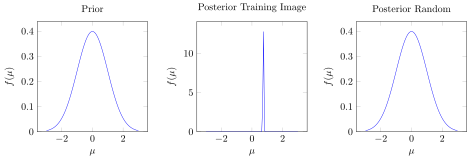

In [57]:
plot_results(npn, X[:, ind], n_prior = 0.01, simple = true, ymin = -3.0, ymax = 3.0)

In [45]:
y_pred = npn.decoder(npn.encoder(X));

In [46]:
ax = Axis(Plots.Scatter(vec(y) .* 10, vec(y_pred) .* 10))
ax.xlabel = "True Crosstrack Error"
ax.ylabel = "Predicted Crosstrack Error"
ax

In [47]:
using BSON
using BSON: @save

In [49]:
@save "../networks/npn_h16_a01_Nformula_rec_finetune.bson" npn